In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample


ModuleNotFoundError: No module named 'wordcloud'

In [9]:
"""The argument sep='\t' tells pandas that the columns in the file are separated by a tab character (not a comma or space). This is important because your data files are tab-separated values (TSV) files, not the more common comma-separated values (CSV) files. Using sep='\t' ensures pandas reads the columns correctly."""
import pandas as pd

data1 = pd.read_csv('training_text', sep='\\|\\|', engine='python', names=['ID', 'Text'], skiprows=1)
data2 = pd.read_csv('training_variants', sep=',')

### Dataset Explanation

**training_variants**
- Contains structured information about each genetic mutation.
- Columns:
  - `ID`: Unique identifier for each mutation.
  - `Gene`: Name of the gene where the mutation is found.
  - `Variation`: The specific change (mutation) in the gene.
  - `Class`: The effect category of the mutation (an integer from 1 to 9, which is the target to predict).

**training_text**
- Contains unstructured text data for each mutation.
- Columns:
  - `ID`: Matches the ID in `training_variants`.
  - `Text`: A detailed description (from medical literature) about the mutation, its context, and possible effects.

For each mutation (ID), you have both structured (gene, variation) and unstructured (text) information. The goal is to use all this information to predict the correct class (effect) of the mutation.

In [10]:
print(data1.head())
print(data2.head()) 

   ID                                               Text
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...
   ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4


In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3321 non-null   int64 
 1   Text    3316 non-null   object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB


In [12]:
data1.describe()
data2.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [13]:
print(data1.shape)
print(data2.shape)

(3321, 2)
(3321, 4)


In [14]:
data2.value_counts()


ID    Gene    Variation             Class
0     FAM58A  Truncating Mutations  1        1
2218  PTEN    C124R                 4        1
2208  PTEN    A126S                 4        1
2209  PTEN    R130G                 4        1
2210  PTEN    H93Q                  4        1
                                            ..
1110  FANCA   Truncating Mutations  1        1
1111  FANCA   H492R                 4        1
1112  FANCA   Y510C                 4        1
1113  FANCA   Deletion              1        1
3320  RUNX1   K83E                  4        1
Name: count, Length: 3321, dtype: int64

In [15]:
print(data2.columns.tolist())

['ID', 'Gene', 'Variation', 'Class']


In [16]:
data2['Class'].value_counts()

Class
7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: count, dtype: int64

In [18]:

data_merged = data2.merge(data1, on='ID', how='left')

# Find the maximum class count
max_count = data_merged['Class'].value_counts().max()

# Oversample each class
balanced_list = []
for c in data_merged['Class'].unique():
    class_subset = data_merged[data_merged['Class'] == c]
    class_oversampled = resample(class_subset, replace=True, n_samples=max_count, random_state=42)
    balanced_list.append(class_oversampled)

data_balanced = pd.concat(balanced_list)

# Shuffle the balanced data
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Split back into variants and text files
training_variants_balanced = data_balanced[['ID', 'Gene', 'Variation', 'Class']]
training_text_balanced = data_balanced[['ID', 'Text']]

# Save to new files
training_variants_balanced.to_csv('training_variants_balanced.csv', index=False)
training_text_balanced.to_csv('training_text_balanced.csv', index=False, sep='||', header=True)

TypeError: "delimiter" must be a 1-character string

In [19]:
# Save as CSV
training_text_balanced.to_csv('training_text_balanced.csv', index=False, sep='\t', header=True)



In [ ]:
data2_balance = pd.read_csv('training_variants_balanced.csv')
data2_balance['Class'].value_counts()


Class
2    953
3    953
4    953
1    953
8    953
5    953
6    953
7    953
9    953
Name: count, dtype: int64

In [22]:
data1_balance = pd.read_csv('training_text_balanced.csv',sep='\t')
data1_balance['Text'].value_counts()

Text
Mutations in BRCA1 and BRCA2 account for the majority of hereditary breast and ovarian cancers, and therefore sequence analysis of both genes is routinely conducted in patients with early-onset breast cancer. Besides mutations that clearly abolish protein function or are known to increase cancer risk, a large number of sequence variants of uncertain signifi cance (VUS) have been identifi ed. Although several functional assays for BRCA1 VUSs have been described, thus far it has not been possible to conduct a high-throughput analysis in the context of the full-length protein. We have developed a relatively fast and easy cDNA-based functional assay to classify BRCA1 VUSs based on their ability to functionally complement BRCA1-defi cient mouse embryonic stem cells. Using this assay, we have analyzed 74 unclassifi ed BRCA1 missense mutants for which all predicted pathogenic variants are confi ned to the BRCA1 RING and BRCT domains.  SIGNIFICANCE: BRCA1 VUSs are frequently found in pati

In [25]:
# Top 5 most common mutation types
top_variations = data2['Variation'].value_counts().head(5)
print("Top 5 mutation types:\n", top_variations)

# Top 5 most common genes
top_genes = data2['Gene'].value_counts().head(5)
print("Top 5 genes:\n", top_genes)

Top 5 mutation types:
 Variation
Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
Name: count, dtype: int64
Top 5 genes:
 Gene
BRCA1    264
TP53     163
EGFR     141
PTEN     126
BRCA2    125
Name: count, dtype: int64


### Insights from Top Genes and Mutation Types

- **Top mutation types** show which specific genetic changes are most common in the dataset. These may represent key biological mechanisms or mutational hotspots in cancer.
- **Top genes** reveal which genes are most frequently mutated. These genes are likely important in cancer development and may be targets for research or therapy.
- Such insights help prioritize genes and mutations for further study, guide feature engineering, and inform model interpretation.
- Understanding the distribution of genes and mutation types can also help identify potential biases or gaps in the dataset.

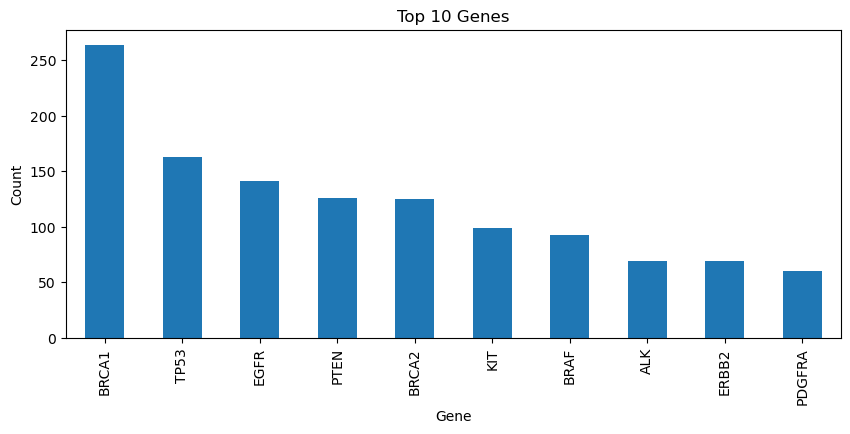

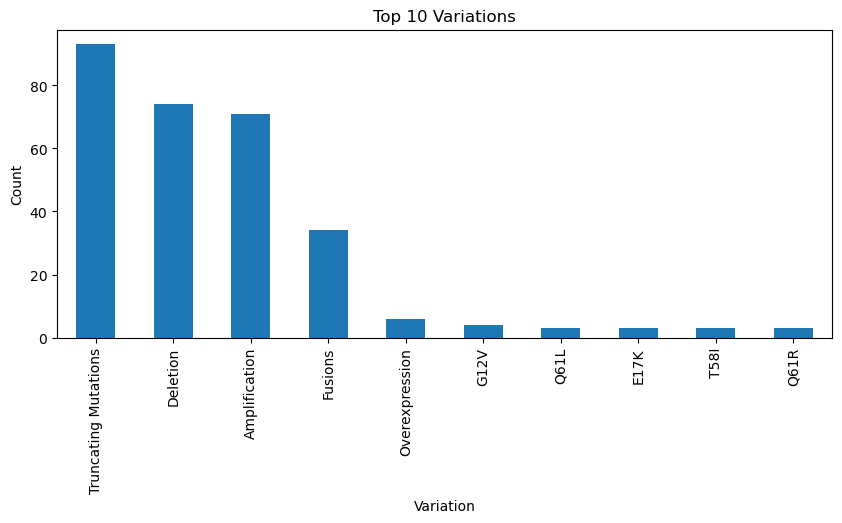

In [27]:
# Top 10 genes
plt.figure(figsize=(10,4))
data2['Gene'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Gene')
plt.ylabel('Count')
plt.title('Top 10 Genes')
plt.show()

# Top 10 variations
plt.figure(figsize=(10,4))
data2['Variation'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.title('Top 10 Variations')
plt.show()

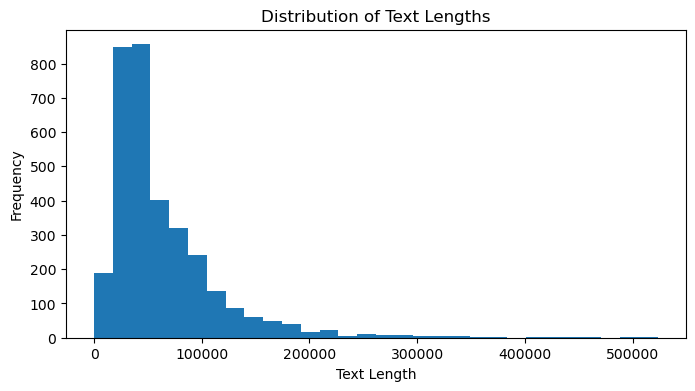

In [28]:
plt.figure(figsize=(8,4))
data1['Text_Length'] = data1['Text'].fillna('').apply(len)
plt.hist(data1['Text_Length'], bins=30)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'